# Linear Algebra

The cell below generates grade data for two tests, p1 and p2, as in class, but with more students.

## 1. Reducing correlations

a) We have already seen that expressing data through mean and difference is a linear transformation. Obtain the mean and difference through matrix multiplication, as seen in class.

b) Calculate the correlation between the data from p1 and p2

c) Calculate the correlation between the transformed data (mean and difference)

d) Comment on the observed correlations.

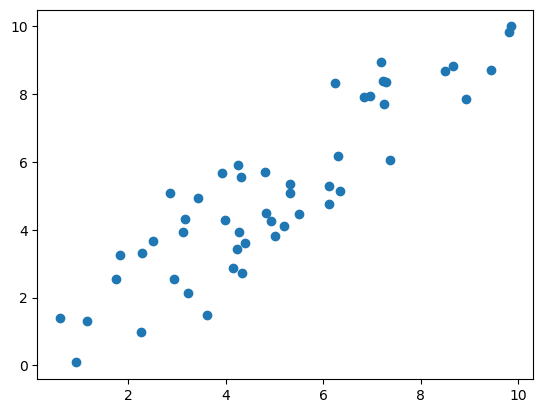

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#creating data
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
plt.scatter(x = df.p1, y= df.p2);

In [4]:
df['mean'] = df.mean(axis=1)
df['evolution'] = df.p2 - df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,mean,evolution
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


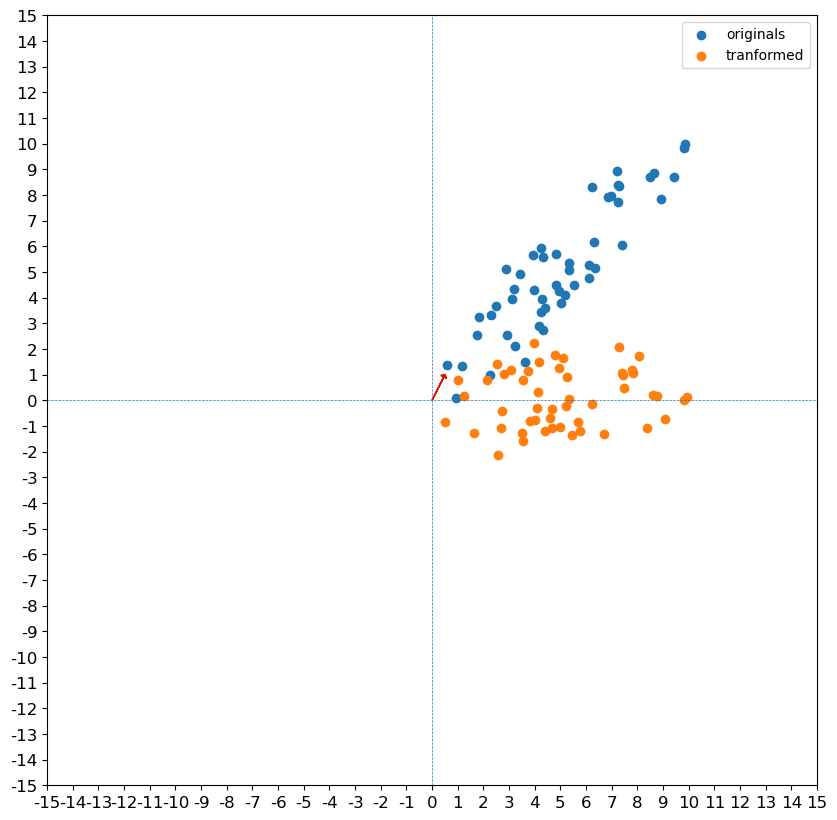

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin,xmax), ylim=(ymin, ymax))

list_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(list_xticks)
labelsx = ax.set_xticklabels(list_xticks, fontsize='large')
                   
lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Tranformation Matrix

m = np.array([[.5, .5],
              [-1, 1]])

# Column vectors of the transformation matrix

ax.arrow(0, 0, m[0,1], m[1,1]
        , head_width=0.25
        , head_length=0.1
        , fc='g', ec='g',
        length_includes_head=True)


ax.arrow(0, 0, m[0,1], m[1,1]
        , head_width=0.25
        , head_length=0.1
        , fc='r', ec='r',
        length_includes_head=True)

# horizontal and vertical reference lines

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Linear transformation
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plot the original data
plt.scatter(df['p1'], df['p2'], label='originals')

# Plot the transformed data
plt.scatter(df_rot[0, :], df_rot[1,:], label="tranformed")

# Legend
plt.legend()

In [11]:
cor_p1p2 = df[['p1', 'p2']].corr(numeric_only=True)
cor_p1p2

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [12]:
cor_t1t2 = df[['mean', 'evolution']].corr(numeric_only=True)
cor_t1t2

,mean,evolution
mean,1.000000,0.133474
evolution,0.133474,1.000000


* Through the result of the correlations, it can be seen that the relationship between p1 and p2 is positive, that is, they depend on each other and therefore if the result of one increases, the other also increases.
* On the other hand, the average and the evolution do not share the same correlation, while one increases the other will decrease, because they are opposites. However, this difference will never be so noticeable because the separation of the values ​​is not so high, it is closer to neutrality.

### It can be seen that the overall mean is low.

## 2. Sum and difference

Now let's perform a similar transformation, but instead of the mean, i'll give the sum of p1 and p2. I'll construct the graph and conclude the visual differences.

In [13]:
df['sum'] = df.p1+df.p2
df.style.format(precision=1, decimal=',')

,p1,p2,mean,evolution,sum
0,"7,0","7,9","7,5","1,0","14,9"
1,"2,9","5,1","4,0","2,2","8,0"
2,"2,3","1,0","1,6","-1,3","3,2"
3,"5,5","4,5","5,0","-1,0","10,0"
4,"7,2","8,9","8,1","1,7","16,1"
5,"4,2","3,4","3,8","-0,8","7,7"
6,"9,8","9,8","9,8","0,0","19,6"
7,"6,8","7,9","7,4","1,1","14,8"
8,"4,8","5,7","5,3","0,9","10,5"
9,"3,9","5,7","4,8","1,8","9,6"


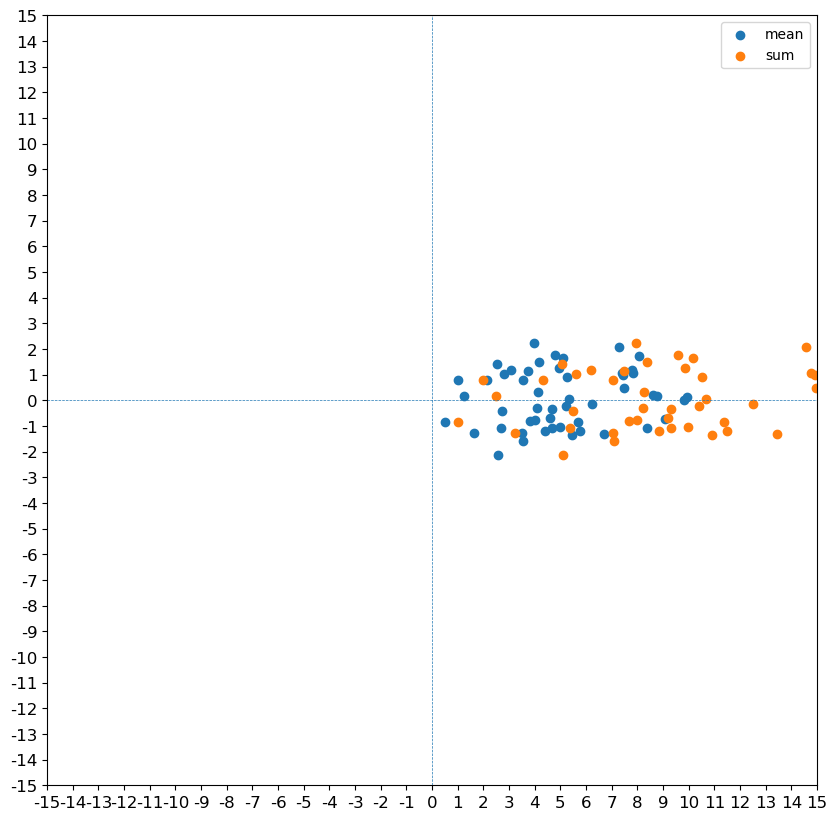

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin,xmax), ylim=(ymin, ymax))

list_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(list_xticks)
labelsx = ax.set_xticklabels(list_xticks, fontsize='large')
                   
lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

# Tranformation Matrix

m = np.array([[.5, .5],
              [-1, 1]])

# horizontal and vertical reference lines

ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plot the mean
plt.scatter(df['mean'], df['evolution'], label='mean')

# Plot the sum
plt.scatter(df['sum'], df['evolution'], label='sum')

# Legend
plt.legend()

* The relationships between p1 and p2 have a certain proportion and maintain it between the values; Furthermore, in the transformation Average x Evolution and Sum x Evolution we see that the average axis is exactly at the midpoint of the sum axis. We can conclude that the sum of the two variables is twice the average, and that the average is half the sum of the two variables. This relationship between the sum, the average and the variables p1 and p2 further reinforces the importance of proportion in data analysis.